In [ ]:
import torch
import numpy as np
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import os
from PIL import Image

#**1.-INTRODUCIÓN A LOS TENSORES**

##Inicialización de tensores

In [ ]:
#Directamente desde los datos
data=[[1,2,4],[4,5,6],[6,7,8]]

In [ ]:
x_data=torch.tensor(data)
print(x_data)
print(data)

tensor([[1, 2, 4],
        [4, 5, 6],
        [6, 7, 8]])
[[1, 2, 4], [4, 5, 6], [6, 7, 8]]


In [ ]:
#Desde  numpy array
n_data=np.array(data)
x_data=torch.from_numpy(n_data)
print(x_data)

tensor([[1, 2, 4],
        [4, 5, 6],
        [6, 7, 8]])


In [ ]:
#Si no se especifíca, mantiene las dimensiones y tipo de datos de los datos de entrada
x_ones=torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones} \n")
print("ones tensor", x_ones)
#Si se especifíca otro tipo de datos lo cambia
x_rand=torch.rand_like(x_data,dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]) 

ones tensor tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])
Random Tensor: 
 tensor([[0.1705, 0.0916, 0.4225],
        [0.5182, 0.3426, 0.9185],
        [0.9288, 0.3905, 0.1409]]) 



In [ ]:
#Crear tensores de una dimensión dada
rand_tensor=torch.rand((2,3,4))
ones_tensor=torch.ones((2,3))
zeros_tensor=torch.zeros((2,3))

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[[0.3453, 0.8764, 0.0950, 0.0112],
         [0.7463, 0.9261, 0.9807, 0.6315],
         [0.6939, 0.2318, 0.1982, 0.0262]],

        [[0.4030, 0.5476, 0.2714, 0.4938],
         [0.1064, 0.6934, 0.0602, 0.9187],
         [0.0344, 0.0230, 0.6675, 0.0835]]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
#Atributos de los tensores

print(zeros_tensor.shape)
print(zeros_tensor.dtype)
print(zeros_tensor.device)


torch.Size([2, 3])
torch.float32
cpu


#Operaciones con tensores

In [ ]:
#Preguntar si hay disponible alguna GPU
torch.cuda.is_available()


False

In [ ]:
# Mover el tensor a la GPU
mitensor=torch.ones(3,3)
#mitensor=mitensor.to('cuda')

if torch.cuda.is_available():
  mitensor=mitensor.to('cuda')

## Indexación y submatrices

In [ ]:
mitensor.shape
mitensor[:,0]
#igual que numpy

tensor([1., 1., 1.])

### Concatenación de tensores

In [ ]:
#Se pueden concatenar tensores por una dimensión dada
tensor2=torch.cat([mitensor,mitensor,mitensor],dim=0)
print(mitensor.shape)
print(tensor2.shape)

torch.Size([3, 3])
torch.Size([9, 3])


### Multiplicación de tensores

In [ ]:
# Producto elemento a elemento
tensor1=torch.rand((3,4))
tensor2=torch.rand((3,4))
print(tensor1)
print(tensor2)
print(tensor1.mul(tensor2))
# Alternativa
print(tensor1*tensor2)

tensor([[0.2525, 0.7656, 0.3556, 0.0724],
        [0.8390, 0.5655, 0.2168, 0.9284],
        [0.9967, 0.2251, 0.7321, 0.8691]])
tensor([[0.9851, 0.7622, 0.7922, 0.3725],
        [0.9310, 0.3020, 0.7255, 0.0969],
        [0.8141, 0.5176, 0.9707, 0.9304]])
tensor([[0.2487, 0.5836, 0.2817, 0.0270],
        [0.7811, 0.1708, 0.1573, 0.0900],
        [0.8114, 0.1165, 0.7106, 0.8087]])
tensor([[0.2487, 0.5836, 0.2817, 0.0270],
        [0.7811, 0.1708, 0.1573, 0.0900],
        [0.8114, 0.1165, 0.7106, 0.8087]])


Multiplicación matricial

In [ ]:
#Traspuesta
tensor1.T
print(tensor1.T.shape)

print(tensor1.matmul(tensor2.T))
# Alternativa:
print(tensor1@tensor2.T)

torch.Size([4, 3])
tensor([[1.1410, 0.7313, 1.0144],
        [1.7751, 1.1992, 2.0500],
        [2.0571, 1.6113, 2.4472]])
tensor([[1.1410, 0.7313, 1.0144],
        [1.7751, 1.1992, 2.0500],
        [2.0571, 1.6113, 2.4472]])


In [ ]:
#Suma

print(tensor1+tensor2)
print(tensor1.add(tensor2))
print(tensor1 +1)
#Division elemento a elemento
tensor1/255.0
tensor1*255.0

tensor([[1.2376, 1.5278, 1.1478, 0.4448],
        [1.7700, 0.8676, 0.9423, 1.0253],
        [1.8108, 0.7427, 1.7028, 1.7996]])
tensor([[1.2376, 1.5278, 1.1478, 0.4448],
        [1.7700, 0.8676, 0.9423, 1.0253],
        [1.8108, 0.7427, 1.7028, 1.7996]])
tensor([[1.2525, 1.7656, 1.3556, 1.0724],
        [1.8390, 1.5655, 1.2168, 1.9284],
        [1.9967, 1.2251, 1.7321, 1.8691]])


tensor([[ 64.3832, 195.2268,  90.6865,  18.4587],
        [213.9558, 144.2042,  55.2767, 236.7385],
        [254.1644,  57.4129, 186.6826, 221.6230]])



Operatciones In-place (in situ). Las operaciones que tienen un _ de sufijo cambian los valores directamente, sin necesidad de variables auxiliares


In [ ]:
print(tensor)
tensor.add(5)#no se actualiza
tensor2=tensor.add(5)
print(tensor2)
print(tensor)
tensor.add_(5)
print(tensor)

tensor([[6., 6.],
        [6., 6.],
        [6., 6.],
        [6., 6.]])
tensor([[6., 6.],
        [6., 6.],
        [6., 6.],
        [6., 6.]])
tensor([[11., 11.],
        [11., 11.],
        [11., 11.],
        [11., 11.]])


In [ ]:
tensor

In [ ]:
#Suma de tensores

tensor+tensor

Las operaciones In-place ahorran memoria pero pueden dar problemas al calcular las derivadas por la pérdida de memoria

## Paso de Torch a Numpy y viceversa

In [ ]:
#Tensor to NumPy array

t=torch.ones(5)
print(t)
n=t.numpy()
print(n)
t.add_(1)
print(t)
print(n)
m=t.add(1)
print(t)
print(n)
print(m)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]
tensor([3., 3., 3., 3., 3.])


In [ ]:
#NumPy array to Tensor
n=np.ones(5)
t=torch.from_numpy(n)
print(n)
print(t)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [ ]:
#Si se ha definido un tensor a través de numpy,
#los cambios en el array de numpy se harán en el tensor
np.add(n,1,out=n)
#n=n+1
print(n)
print(t)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


##CARGA DE DATOS 

Descarga de datos precargadas:

https://pytorch.org/vision/stable/datasets.html



In [ ]:

#Descargar y construir MNIST dataset.
train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                             train=True, 
                                             transform=transforms.ToTensor(),
                                             download=True)

#Seleccionar un par de datos (lee datos del disco)
print(len(train_dataset))

image,label=train_dataset[0]

60000


torch.Size([1, 28, 28])


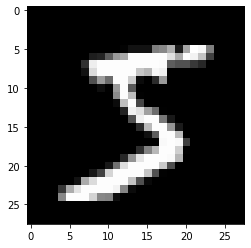

5


In [ ]:
#Pintar una imagen y una etiqueta
print(image.shape)
#Para pintar, pasar el tensor a formato PIL
img=F.to_pil_image(image)
plt.imshow(img,cmap='gray')
plt.show()
print(label)
#TENSORES: (B,C,W,H)
#NUMPY: (B,W,H,C)

In [ ]:
#CIFAR-10 dataset.
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True, 
                                             transform=transforms.ToTensor(),
                                             download=True)

# Seleccionar un par
image,label=train_dataset[0]
# Data loader (Generador de batches).

train_loader=torch.utils.data.DataLoader(dataset=train_dataset,
                                         batch_size=64,
                                         shuffle=True)

# Cuando comienza la iteración, la cola y el subproceso comienzan a cargar datos de los archivos.
                                         
data_iter=iter(train_loader)

# Mini-batch images and labels.

images,labels=data_iter.next()

print(images.shape)

# Uso de imagenes y etiquetas en el entrenamiento
for images, labels in train_loader:
    # Escribir codigo de entrenamiento 
    pass


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../../data/cifar-10-python.tar.gz to ../../data/
torch.Size([64, 3, 32, 32])


Carga de datos propios

In [ ]:
!mkdir "/content/sample_data/MisDatos/"
!unzip "/content/sample_data/harry_potter.zip" -d "/content/sample_data/MisDatos/"

Archive:  /content/sample_data/harry_potter.zip
   creating: /content/sample_data/MisDatos/harry_potter/
  inflating: /content/sample_data/MisDatos/harry_potter/harrypotter.jpeg  
  inflating: /content/sample_data/MisDatos/harry_potter/ronweasley.jpeg  
  inflating: /content/sample_data/MisDatos/harry_potter/hermionegranger.jpeg  
  inflating: /content/sample_data/MisDatos/harry_potter/snape.jpeg  
  inflating: /content/sample_data/MisDatos/harry_potter/dracomalfoy.jpeg  
  inflating: /content/sample_data/MisDatos/harry_potter/dumbledore.jpeg  
  inflating: /content/sample_data/MisDatos/harry_potter/siriusblack.jpeg  
  inflating: /content/sample_data/MisDatos/harry_potter/dobby.jpeg  
  inflating: /content/sample_data/MisDatos/harry_potter/voldemort.jpeg  


['harrypotter.jpeg', 'dracomalfoy.jpeg', 'voldemort.jpeg', 'dumbledore.jpeg', 'siriusblack.jpeg', 'ronweasley.jpeg', 'hermionegranger.jpeg', 'dobby.jpeg', 'snape.jpeg']
255


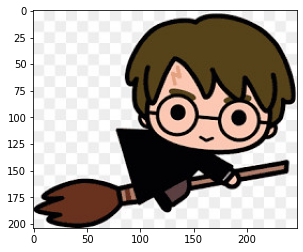

harrypotter
tensor(1.)


In [ ]:
#Ejemplo de importación de datos

#Obtener lista de todas imágenes de una carpeta
contenido = os.listdir("/content/sample_data/MisDatos/harry_potter")
print(contenido)

import numpy as np
ruta="/content/sample_data/MisDatos/harry_potter/"

#Importar una imagen

img1=Image.open(ruta+contenido[0])
img=np.array(img1)
print(np.max(img))
#Visualizar una imagen

plt.imshow(img1)
plt.show()

#Visualizar una etiqueta
print(contenido[0][:-5])
label=contenido[0][:-5]

#Convertir imagen PIL en tensor

img=transforms.ToTensor()(img1)#transforma pIL a tensor + reescala a 0-1

print(torch.max(img))

In [ ]:
ruta+contenido[0]

'/content/sample_data/MisDatos/harry_potter/harrypotter.jpeg'

In [ ]:
import os
from PIL import Image
# Construcción de la base de datos propia 

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self):
     
        # 1. Inicialización de rutas y nombres de ficheros
        self._ruta="/content/sample_data/MisDatos/harry_potter/"
        self.lista_imagenes=os.listdir(self._ruta)
        self.cont=0
       
        pass
    def __getitem__(self, index):
        # TODO
        # 1. Leer un dato de un fichero (e.g. usando using numpy.fromfile, PIL.Image.open).
               
        img=Image.open(self._ruta+self.lista_imagenes[self.cont])
        label=self.lista_imagenes[self.cont][:-5]
        # 2. Preproceso de datos (e.g. torchvision.Transform).
        img=img.resize((235,235))
        img=transforms.ToTensor()(img)#/255.0

        # 3. Devolver un par de datos (e.g. image and label).
        self.cont=self.cont+1
        if (self.cont>=len(self.lista_imagenes)):
          self.cont=0
         
        return (img,label)
        #pass
    def __len__(self):
        #Cambiar 0 por el tamaño de los datos
        return len(self.lista_imagenes)

# Usar la base de datos construida

custom_dataset=CustomDataset()
train_loader=torch.utils.data.DataLoader(dataset=custom_dataset,
                                         batch_size=3,
                                         shuffle=True)

torch.Size([3, 3, 235, 235])
torch.Size([3, 235, 235])


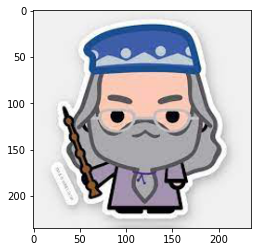

dumbledore
torch.Size([3, 235, 235])


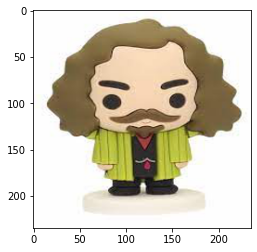

siriusblack
torch.Size([3, 235, 235])


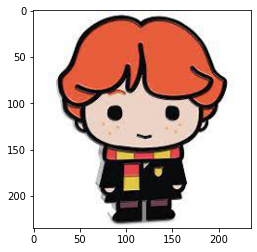

ronweasley


In [ ]:

# Cuando comienza la iteración, la cola y el subproceso comienzan a cargar datos de los archivos.
data_iter=iter(train_loader)

# Mini-batch images and labels.
images,labels=data_iter.next()

print(images.shape)

for i in range(images.shape[0]):
  img=images[i]
  print(img.shape)
  img1=F.to_pil_image(img)
  plt.imshow(img1)
  plt.show()
  print(labels[i])
  

In [ ]:
torch.max(images)

# **2.- PREPROCESO**

Las transformaciones más comunes se encuentran en el modulo torchvision.transforms.

Se puede concatenar varias transformaciones usando Compose.

Muchas clases de transformación tienen funciones equivalentes.

Algunas funciones son aptas para formato PIL y otras para tensores. Para pasar de uno a otro:

ToPILImage([mode]) -> Convert a tensor or an ndarray to PIL Image.

ToTensor() ->Convert a PIL Image or numpy.ndarray to tensor.

PILToTensor() -> Convert a PIL Image to a tensor of the same type.

Se aceptan batches de imagenes. Las dimensiones son (B, C, H, W)

Lista de transformaciones: https://pytorch.org/vision/stable/transforms.html



In [ ]:
#Imagen original





In [ ]:
#Padding


In [ ]:
#Reescalar

In [ ]:
#Recorte aleatorio


In [ ]:
#Escala de grises

In [ ]:
#Aumento aleatorio

In [ ]:
#Composicion de tranformaciones


#**3.- AUTOGRAD**

Ejemplo básico de cálculo de derivadas

In [ ]:
#Creamos tensores
x=torch.tensor(4.,requires_grad=True)
w=torch.tensor(2.,requires_grad=True)
b=torch.tensor(3.,requires_grad=True)

#Grafo



In [ ]:
#Se construye un grafo de computación:

y=w*x+b

In [ ]:
# Se calculan los gradientes

y.backward()

In [ ]:

# Se pintan los gradientes

print(x.grad)
print(w.grad)
print(b.grad)

tensor(2.)
tensor(4.)
tensor(1.)


Ejemplo MLP. Regresión

In [ ]:


# Creamos dos tensores aleatorios
x=torch.rand(10,3)
y=torch.rand(10,2)

# Definimos capas

linear=nn.Linear(3,2)

# Construimos función de pérdida y optimizador

criterion = nn.MSELoss() #error cuadratico medio
optimizer =torch.optim.SGD(linear.parameters(),lr=0.01)

# Construcción del grafo

pred=linear(x)

#Calculamos error:

loss=criterion(pred,y)
print('loss: ',loss.item())

#Calculamos gradientes

loss.backward()

# Retropropagamos

optimizer.step()

# Error después de retropropagar
pred=linear(x)
loss=criterion(pred,y)
print("loss:",loss.item())

loss:  0.22652459144592285
loss: 0.22126133739948273


In [ ]:
#MLP con base de datos MNIST. Problema de Clasificación



# Hyper-parameters 
input_size = 28 * 28    # 784
num_classes = 10
num_epochs = 5
batch_size = 10
learning_rate = 0.001

# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Logistic regression model

model=nn.Linear(input_size,num_classes)

# Loss and optimizer
# nn.CrossEntropyLoss() computes softmax internally

cirterion=nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(model.parameters(),lr=learning_rate)
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Reshape images to (batch_size, input_size)
        images = images.reshape(-1, input_size)
        
        # Forward pass
        outputs=model(images)
        loss=criterion(outputs,labels)
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: ignored

#**3.- DEFINICIÓN DE UNA RED NEURONAL**

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

In [ ]:
model = NeuralNetwork().to(device)
print(model)

In [ ]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

#**4.- ENTRENAMIENTO DE UNA RED NEURONAL**

In [ ]:
# ================================================================== #
#                       Modelo Preentrenado                  #
# ================================================================== #

# Importar pesos de una red Resnet18
resnet = torchvision.models.resnet18(pretrained=True)

# Solo se quiere hacer fine-tunning-> se indica que no se va a entrenar los pesos de la red
for param in resnet.parameters():
    param.requires_grad = False

# Se añade la última caoa de salida
resnet.fc = nn.Linear(resnet.fc.in_features, 100)  # 100 is an example.

# Forward pass.
images = torch.randn(64, 3, 224, 224)
outputs = resnet(images)
print (outputs.size())     # (64, 100)


In [ ]:
# ================================================================== #
#                     GUARDAR Y CARGAR MODELOS             #
# ================================================================== #

# Modelo entero

# Solo parametros (recomendado)




In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Configuración del dispositivo
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

#**5.-OTROS TIPOS DE REDES NEURONALES**

##REDES CONVOLUCIONALES

In [ ]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
       
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

##REDES RECURRENTES

In [ ]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
sequence_length = 28
input_size = 28
hidden_size = 128
num_layers = 2
num_classes = 10
batch_size = 100
num_epochs = 2
learning_rate = 0.01

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

# Recurrent neural network (many-to-one)
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # Set initial hidden and cell states 
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)
        
        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total)) 

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

##RESNET

In [ ]:
# ---------------------------------------------------------------------------- #
# An implementation of https://arxiv.org/pdf/1512.03385.pdf                    #
# See section 4.2 for the model architecture on CIFAR-10                       #
# Some part of the code was referenced from below                              #
# https://github.com/pytorch/vision/blob/master/torchvision/models/resnet.py   #
# ---------------------------------------------------------------------------- #

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
num_epochs = 80
batch_size = 100
learning_rate = 0.001

# Image preprocessing modules
transform = transforms.Compose([
    transforms.Pad(4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32),
    transforms.ToTensor()])

# CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True, 
                                             transform=transform,
                                             download=True)

test_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                            train=False, 
                                            transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# 3x3 convolution
def conv3x3(in_channels, out_channels, stride=1):
    return nn.Conv2d(in_channels, out_channels, kernel_size=3, 
                     stride=stride, padding=1, bias=False)

# Residual block
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = conv3x3(in_channels, out_channels, stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(out_channels, out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample
        
    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

# ResNet
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 16
        self.conv = conv3x3(3, 16)
        self.bn = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(block, 16, layers[0])
        self.layer2 = self.make_layer(block, 32, layers[1], 2)
        self.layer3 = self.make_layer(block, 64, layers[2], 2)
        self.avg_pool = nn.AvgPool2d(8)
        self.fc = nn.Linear(64, num_classes)
        
    def make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if (stride != 1) or (self.in_channels != out_channels):
            downsample = nn.Sequential(
                conv3x3(self.in_channels, out_channels, stride=stride),
                nn.BatchNorm2d(out_channels))
        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for i in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out
    
model = ResNet(ResidualBlock, [2, 2, 2]).to(device)


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# For updating learning rate
def update_lr(optimizer, lr):    
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

# Train the model
total_step = len(train_loader)
curr_lr = learning_rate
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ("Epoch [{}/{}], Step [{}/{}] Loss: {:.4f}"
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

    # Decay learning rate
    if (epoch+1) % 20 == 0:
        curr_lr /= 3
        update_lr(optimizer, curr_lr)

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'resnet.ckpt')

#**6.- TENSORBOARD**

In [ ]:
!pip install tensorboard
#!pip install tensorboard --upgrade

In [ ]:
#Crear repositorio. Por defecto, lo crea en ./runs/

import torch
import datetime
from torch.utils.tensorboard import SummaryWriter
current_time = str(datetime.datetime.now().timestamp())
train_log_dir = 'runs/tensorboard/train/' + current_time
test_log_dir = 'runs/tensorboard/test/' + current_time
train_summary_writer = SummaryWriter(train_log_dir)
test_summary_writer = SummaryWriter(test_log_dir)

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        #Guardar escalares en tensorboard

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        train_summary_writer.add_scalar("Acc/train", correct, epoch)

        train_summary_writer.add_scalar("Loss/train", loss, epoch)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

        # Test the model
        # In test phase, we don't need to compute gradients (for memory efficiency)
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.reshape(-1, 28*28).to(device)
                labels = labels.to(device)
                outputs = model(images)
                loss_tst = criterion(outputs, labels)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                test_summary_writer.add_scalar("Loss/test", loss_tst, epoch)
                test_summary_writer.add_scalar("Acc/test", correct, epoch)
            if (i+1) % 100 == 0:
              print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

        # Save the model checkpoint
        torch.save(model.state_dict(), 'model.ckpt')

        writer.flush()
writer.close()

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=runs/tensorboard

#**7.- MI MODELO**

### 1.- Entrenar una red CNN de clasificación binaria con los datos harry_potter_v2 para clasificar los personajes en Gryffindor o Slytherin
### 2.-  Obtener loss y accuracy de train y test en cada interación.
### 3.- Pintar salida en tensorboard
### 4.- Incluir aumentado de datos.
### 5.- Modificar CNN y/o aumentado de datos para mejorar los resultados